# Лабораторна робота 6
### Студента групи МІТ-31 (підгрупа 1)
### Дриги Михайла Сергійовича

## Завдання
1. Виконати вирішення задачs класифікації для 3 класів з набору даних food101
2. Індекси класів визначити індивідуально за залежностями: i1=n-1,i2=n+29,i3=n+59 (де і1,і2,і3 - індекс класу (починаючи з 0) у відсортованому за алфавітом наборі даних, n - номер за списком (обчислені значення індексів вказані у даному документі у стовпчиках D:F) )
3. Отримані результати викласти на github у репозиторій ml2021 в основну (default) гілку в папці Lab6.


In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import pathlib
import numpy as np
import pandas as pd
import zipfile
import os

In [2]:
zip_ref = zipfile.ZipFile("101_food_classes_10_percent.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [3]:
main_dir="101_food_classes_10_percent"

In [4]:
for dirpath, dirnames, filenames in os.walk(main_dir):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '101_food_classes_10_percent'.
There are 101 directories and 0 images in '101_food_classes_10_percent\test'.
There are 0 directories and 250 images in '101_food_classes_10_percent\test\apple_pie'.
There are 0 directories and 250 images in '101_food_classes_10_percent\test\baby_back_ribs'.
There are 0 directories and 250 images in '101_food_classes_10_percent\test\baklava'.
There are 0 directories and 250 images in '101_food_classes_10_percent\test\beef_carpaccio'.
There are 0 directories and 250 images in '101_food_classes_10_percent\test\beef_tartare'.
There are 0 directories and 250 images in '101_food_classes_10_percent\test\beet_salad'.
There are 0 directories and 250 images in '101_food_classes_10_percent\test\beignets'.
There are 0 directories and 250 images in '101_food_classes_10_percent\test\bibimbap'.
There are 0 directories and 250 images in '101_food_classes_10_percent\test\bread_pudding'.
There are 0 directories and 250 images in '10

In [5]:
data_dir = pathlib.Path("101_food_classes_10_percent/train/") 
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) 
print(class_names)

['apple_pie' 'baby_back_ribs' 'baklava' 'beef_carpaccio' 'beef_tartare'
 'beet_salad' 'beignets' 'bibimbap' 'bread_pudding' 'breakfast_burrito'
 'bruschetta' 'caesar_salad' 'cannoli' 'caprese_salad' 'carrot_cake'
 'ceviche' 'cheese_plate' 'cheesecake' 'chicken_curry'
 'chicken_quesadilla' 'chicken_wings' 'chocolate_cake' 'chocolate_mousse'
 'churros' 'clam_chowder' 'club_sandwich' 'crab_cakes' 'creme_brulee'
 'croque_madame' 'cup_cakes' 'deviled_eggs' 'donuts' 'dumplings' 'edamame'
 'eggs_benedict' 'escargots' 'falafel' 'filet_mignon' 'fish_and_chips'
 'foie_gras' 'french_fries' 'french_onion_soup' 'french_toast'
 'fried_calamari' 'fried_rice' 'frozen_yogurt' 'garlic_bread' 'gnocchi'
 'greek_salad' 'grilled_cheese_sandwich' 'grilled_salmon' 'guacamole'
 'gyoza' 'hamburger' 'hot_and_sour_soup' 'hot_dog' 'huevos_rancheros'
 'hummus' 'ice_cream' 'lasagna' 'lobster_bisque' 'lobster_roll_sandwich'
 'macaroni_and_cheese' 'macarons' 'miso_soup' 'mussels' 'nachos'
 'omelette' 'onion_rings' 'oy

In [6]:
n = 3

l = []
arr = (n - 1, n + 29, (n + 59) % 100)
for i in range(len(class_names)):
    if i in arr:
        l.append(class_names[i])

print(l)

['baklava', 'dumplings', 'macaroni_and_cheese']


Image shape: (512, 342, 3)


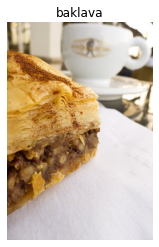

In [9]:
def view_random_image(target_dir, target_class):
      
  target_folder = target_dir+target_class

  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") 

  return img

img = view_random_image(target_dir="101_food_classes_10_percent/train/",
                        target_class="baklava")

In [10]:
img

array([[[ 76,  63,  29],
        [ 67,  54,  20],
        [ 69,  56,  21],
        ...,
        [119, 107,  85],
        [115, 102,  85],
        [119, 107,  93]],

       [[ 78,  65,  31],
        [ 68,  55,  21],
        [ 69,  56,  21],
        ...,
        [140, 129, 107],
        [119, 106,  87],
        [116, 104,  88]],

       [[ 83,  68,  35],
        [ 71,  56,  23],
        [ 71,  57,  22],
        ...,
        [171, 160, 138],
        [128, 117,  95],
        [114, 103,  83]],

       ...,

       [[173, 167, 171],
        [176, 170, 174],
        [177, 171, 175],
        ...,
        [220, 217, 224],
        [219, 216, 223],
        [219, 216, 223]],

       [[170, 164, 168],
        [174, 168, 172],
        [176, 170, 174],
        ...,
        [218, 215, 222],
        [218, 215, 222],
        [217, 214, 221]],

       [[166, 160, 164],
        [171, 165, 169],
        [174, 168, 172],
        ...,
        [216, 213, 220],
        [216, 213, 220],
        [216, 213, 220]]

In [11]:
img/255.

array([[[0.29803922, 0.24705882, 0.11372549],
        [0.2627451 , 0.21176471, 0.07843137],
        [0.27058824, 0.21960784, 0.08235294],
        ...,
        [0.46666667, 0.41960784, 0.33333333],
        [0.45098039, 0.4       , 0.33333333],
        [0.46666667, 0.41960784, 0.36470588]],

       [[0.30588235, 0.25490196, 0.12156863],
        [0.26666667, 0.21568627, 0.08235294],
        [0.27058824, 0.21960784, 0.08235294],
        ...,
        [0.54901961, 0.50588235, 0.41960784],
        [0.46666667, 0.41568627, 0.34117647],
        [0.45490196, 0.40784314, 0.34509804]],

       [[0.3254902 , 0.26666667, 0.1372549 ],
        [0.27843137, 0.21960784, 0.09019608],
        [0.27843137, 0.22352941, 0.08627451],
        ...,
        [0.67058824, 0.62745098, 0.54117647],
        [0.50196078, 0.45882353, 0.37254902],
        [0.44705882, 0.40392157, 0.3254902 ]],

       ...,

       [[0.67843137, 0.65490196, 0.67058824],
        [0.69019608, 0.66666667, 0.68235294],
        [0.69411765, 0

In [12]:
tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = main_dir+"/train/"
test_dir = main_dir+"/test/"

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, 
                                               target_size=(224, 224), 
                                               class_mode="sparse", seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="sparse",
                                               seed=42)



model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, 
                         activation="relu", 
                         input_shape=(224, 224, 3)), 
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, 
                            padding="valid"), 
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), 
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="softmax")
])

model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history_1 = model_1.fit(train_data,
                        epochs=2,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 225 images belonging to 3 classes.
Found 750 images belonging to 3 classes.
Epoch 1/2
8/8 [==============================] - 18s 2s/step - loss: 0.3039 - accuracy: 0.3333 - val_loss: -0.0052 - val_accuracy: 0.3333
Epoch 2/2
8/8 [==============================] - 13s 2s/step - loss: -0.3411 - accuracy: 0.3333 - val_loss: -0.4875 - val_accuracy: 0.3333


In [13]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

<AxesSubplot:title={'center':'History ins_model'}, xlabel='epochs', ylabel='loss'>

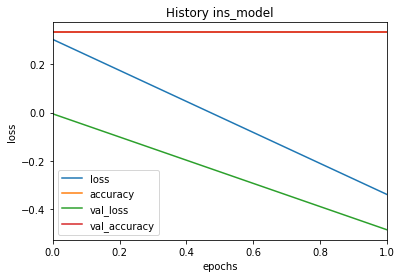

In [14]:
pd.DataFrame(history_1.history).plot(xlabel="epochs", 
ylabel="loss",title="History ins_model", xlim=(0,1))

In [15]:
def plot_loss_curves(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    # Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

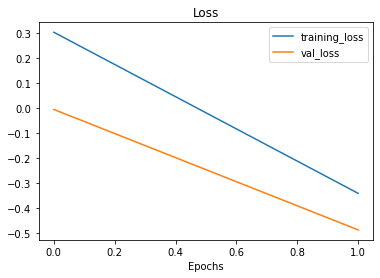

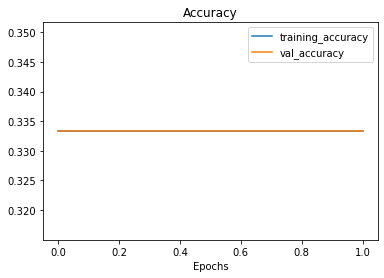

In [16]:
plot_loss_curves(history_1)

In [17]:
model_1.save('model1.h5')